In [31]:
from matplotlib import image
from matplotlib import pyplot
import os
import numpy as np
from sklearn import model_selection

DataPreProcessing:

0 1 2 3 4 5 6 7 8 9 a b c d e f g h i j k l m n o p q r s t u v w x y z uint8 (400, 400, 3)
(2515, 400, 400, 3) (2515,) 36
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


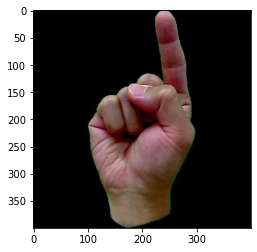

In [32]:
path = './asl_dataset/'
data,rawLabel = [],[]
labelTypes=[]
for root, dirs, files in os.walk(path):
    key = os.path.basename(root)
    if key=="": continue
    labelTypes.append(key)
    print(key, end=' ')
    for file in files:
        full_file_path = os.path.join(root,file)
        img = image.imread(full_file_path)
        #print(img.dtype)
        #print(img.shape)
        #img = image.resize(img,(128,128))
        data.append(img)
        rawLabel.append(key)

data = np.array(data)
rawLabel = np.array(rawLabel)
labelNum=len(labelTypes)
print(img.dtype,img.shape)
pyplot.imshow(img)
print(data.shape,rawLabel.shape,labelNum)
print(labelTypes)

In [33]:
label=np.array([[rawLabel[i]==labelTypes[j] for j in range(labelNum)]for i in range(len(rawLabel))]).astype('f4')
print(label.shape)
print(label[0])
print(label[-1])

(2515, 36)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [36]:
#split data into train and test for cross validation
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, label, train_size=0.8, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2012, 400, 400, 3) (503, 400, 400, 3) (2012, 36) (503, 36)


Data Analysis:

By observing the following histgram, 

we find that each type of images are almost the same amount(70).

By looking through each data type folder, 

we find that the qulities of each type of data is presistent.

(array([70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
        70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70., 70.,
        70., 70., 70., 65., 70., 70., 70., 70., 70., 70.]),
 array([ 0.        ,  0.97222222,  1.94444444,  2.91666667,  3.88888889,
         4.86111111,  5.83333333,  6.80555556,  7.77777778,  8.75      ,
         9.72222222, 10.69444444, 11.66666667, 12.63888889, 13.61111111,
        14.58333333, 15.55555556, 16.52777778, 17.5       , 18.47222222,
        19.44444444, 20.41666667, 21.38888889, 22.36111111, 23.33333333,
        24.30555556, 25.27777778, 26.25      , 27.22222222, 28.19444444,
        29.16666667, 30.13888889, 31.11111111, 32.08333333, 33.05555556,
        34.02777778, 35.        ]),
 <BarContainer object of 36 artists>)

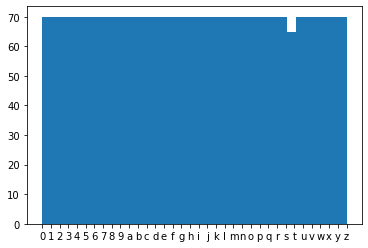

In [35]:
pyplot.hist(rawLabel,bins=labelNum)